In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# Explanation of interpretation
#subm_summary = pd.read_csv("/mnt/c/Users/ashleyconard/Downloads/submission_summary.txt", sep="\t", skiprows=15, header=0)
#count = (~subm_summary['ExplanationOfInterpretation'].str.contains('-')).sum()

gencc_s = pd.read_csv("/home/azureuser/submissions-export-csv", header=0) # skiprows=15
out_dir = "/home/azureuser/gencc_summaries/"


In [5]:
gencc_s.head()

,uuid,gene_curie,gene_symbol,disease_curie,disease_title,disease_original_curie,disease_original_title,classification_curie,classification_title,moi_curie,...,submitted_as_submitter_name,submitted_as_classification_id,submitted_as_classification_name,submitted_as_date,submitted_as_public_report_url,submitted_as_notes,submitted_as_pmids,submitted_as_assertion_criteria_url,submitted_as_submission_id,submitted_run_date
0,GENCC_000101-HGNC_10896-OMIM_182212-HP_0000006...,HGNC:10896,SKI,MONDO:0008426,Shprintzen-Goldberg syndrome,OMIM:182212,Shprintzen-Goldberg syndrome,GENCC:100001,Definitive,HP:0000006,...,Ambry Genetics,GENCC:100001,Definitive,2018-03-30 13:31:56,NaN,NaN,NaN,PMID: 28106320,1034,2020-12-24
1,GENCC_000101-HGNC_16636-OMIM_171300-HP_0000006...,HGNC:16636,KIF1B,MONDO:0008233,pheochromocytoma,OMIM:171300,"{Pheochromocytoma, susceptibility to}",GENCC:100003,Moderate,HP:0000006,...,Ambry Genetics,GENCC:100003,Moderate,2019-12-04 13:30:43,NaN,NaN,NaN,PMID: 28106320,69237,2020-12-24
2,GENCC_000101-HGNC_16636-OMIM_118210-HP_0000006...,HGNC:16636,KIF1B,MONDO:0007308,Charcot-Marie-Tooth disease type 2A1,OMIM:118210,"Charcot-Marie-Tooth disease, type 2A1",GENCC:100004,Limited,HP:0000006,...,Ambry Genetics,GENCC:100004,Limited,2022-09-02 00:00:00,NaN,NaN,NaN,https://onlinelibrary.wiley.com/doi/10.1002/hu...,61327,2023-08-19
3,GENCC_000101-HGNC_17939-OMIM_617532-HP_0000007...,HGNC:17939,SLC45A1,MONDO:0044322,intellectual developmental disorder with neuro...,OMIM:617532,Intellectual developmental disorder with neuro...,GENCC:100004,Limited,HP:0000007,...,Ambry Genetics,GENCC:100004,Limited,2020-06-26 13:32:00,NaN,NaN,NaN,PMID: 28106320,72178,2020-12-24
4,GENCC_000101-HGNC_11071-OMIM_616291-HP_0000007...,HGNC:11071,SLC9A1,MONDO:0014572,Lichtenstein-Knorr syndrome,OMIM:616291,Lichtenstein-Knorr syndrome,GENCC:100004,Limited,HP:0000007,...,Ambry Genetics,GENCC:100004,Limited,2018-08-31 13:32:02,NaN,NaN,NaN,PMID: 28106320,1705,2020-12-24


In [6]:
# Replace submitted_as_pmids column blank values with NaN
gencc_s['submitted_as_pmids'] = gencc_s['submitted_as_pmids'].replace('', np.nan)
    
# Remove rows where 'submitted_as_pmids' is NaN
gencc_s = gencc_s.dropna(subset=['submitted_as_pmids'])

# Replace all occurrences of 'LIMITED' with 'Limited' and 'Definitive ' with 'Definitive'
gencc_s['submitted_as_classification_name'] = gencc_s['submitted_as_classification_name'].replace({'LIMITED': 'Limited', 'Definitive ': 'Definitive', 'Modeare': 'Moderate', ' Moderate': 'Moderate', 'Moderate ': 'Moderate', 'Disputed evidence': 'Disputed Evidence', 'Disputed': 'Disputed Evidence', 'STRONG': 'Strong', 'Strong ': 'Strong', ' Strong': 'Strong'})

/tmp/ipykernel_3524870/437446020.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='submitted_as_classification_name', y='unique_disease_count', data=grouped_df, palette=color_dict)


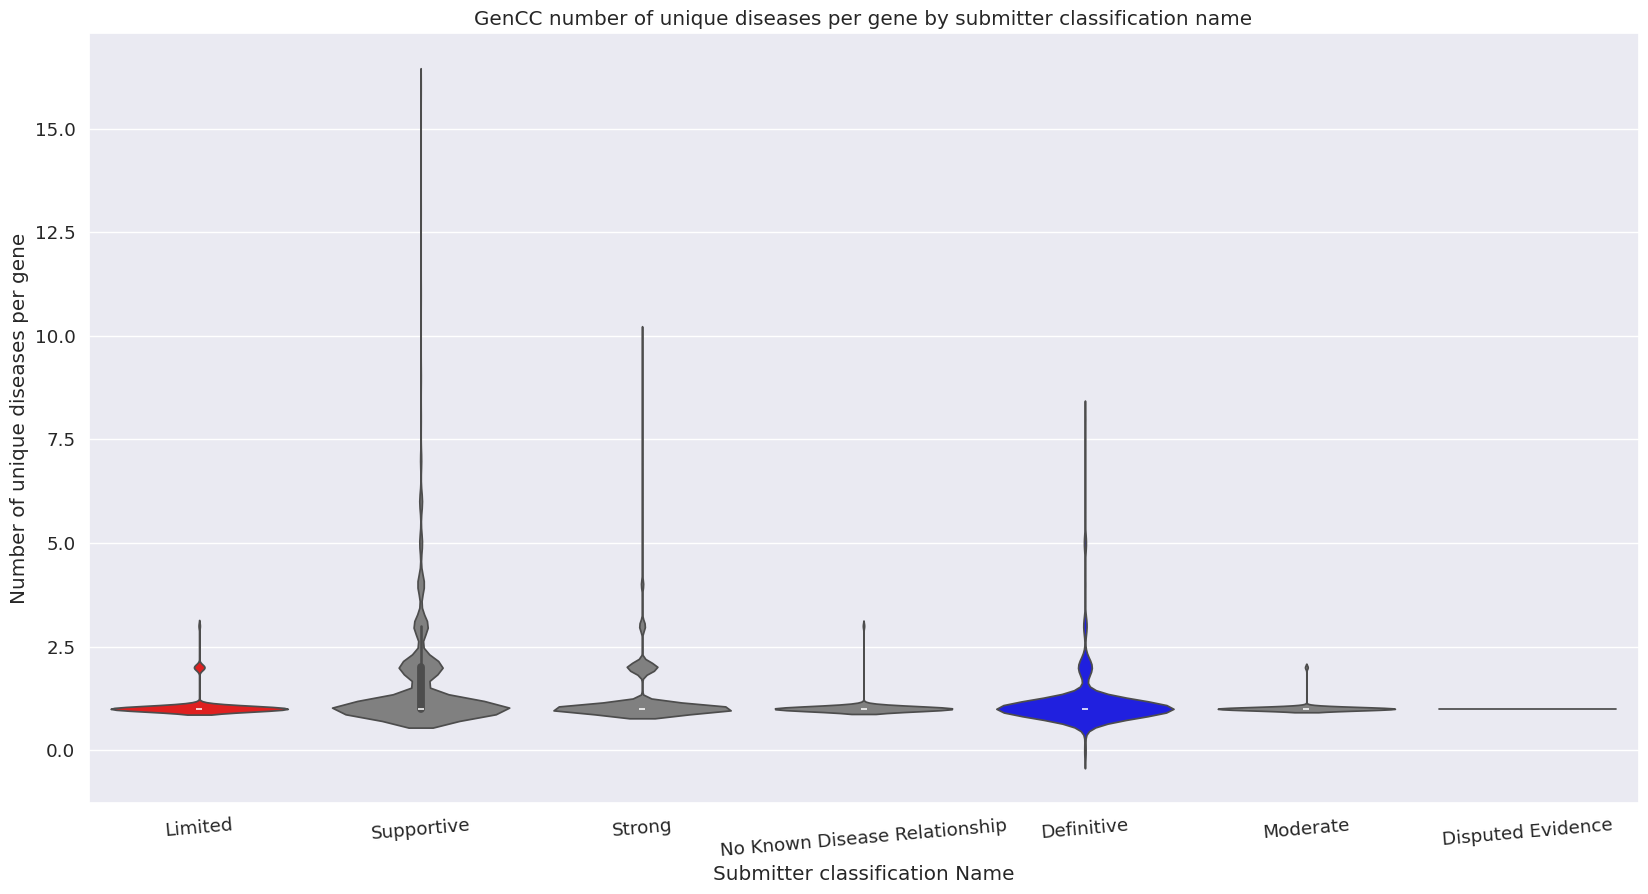

In [7]:
def create_palette(data, colors):
    unique_categories = data['submitted_as_classification_name'].unique()
    palette = {}
    for category in unique_categories:
        if category in colors:
            palette[category] = colors[category]
        else:
            palette[category] = 'grey'  # Default color
    return palette

# Increase the default font size
sns.set(font_scale=1.2)

# Group by 'gene_symbol' and 'submitted_as_classification_name', and count unique 'disease_title'
grouped_df = gencc_s.groupby(['gene_symbol', 'submitted_as_classification_name'])['disease_title'].nunique().reset_index(name='unique_disease_count')

color_dict = create_palette(grouped_df, {'Limited': 'red', 'Definitive': 'blue'})

plt.figure(figsize=(20, 10))
sns.violinplot(x='submitted_as_classification_name', y='unique_disease_count', data=grouped_df, palette=color_dict)
plt.xticks(rotation=5)
plt.xlabel('Submitter classification Name')
plt.ylabel('Number of unique diseases per gene')
plt.title("GenCC number of unique diseases per gene by submitter classification name")

plt.show()

In [8]:
grouped_df[grouped_df['submitted_as_classification_name'] == 'Disputed Evidence']

,gene_symbol,submitted_as_classification_name,unique_disease_count
1291,CEP250,Disputed Evidence,1
1545,CNTN4,Disputed Evidence,1
2456,EPHA4,Disputed Evidence,1
2850,FREM1,Disputed Evidence,1
3415,HFM1,Disputed Evidence,1
5147,NODAL,Disputed Evidence,1
6338,RIMS1,Disputed Evidence,1
6569,SAMHD1,Disputed Evidence,1
7259,SPIDR,Disputed Evidence,1
7583,TDP1,Disputed Evidence,1


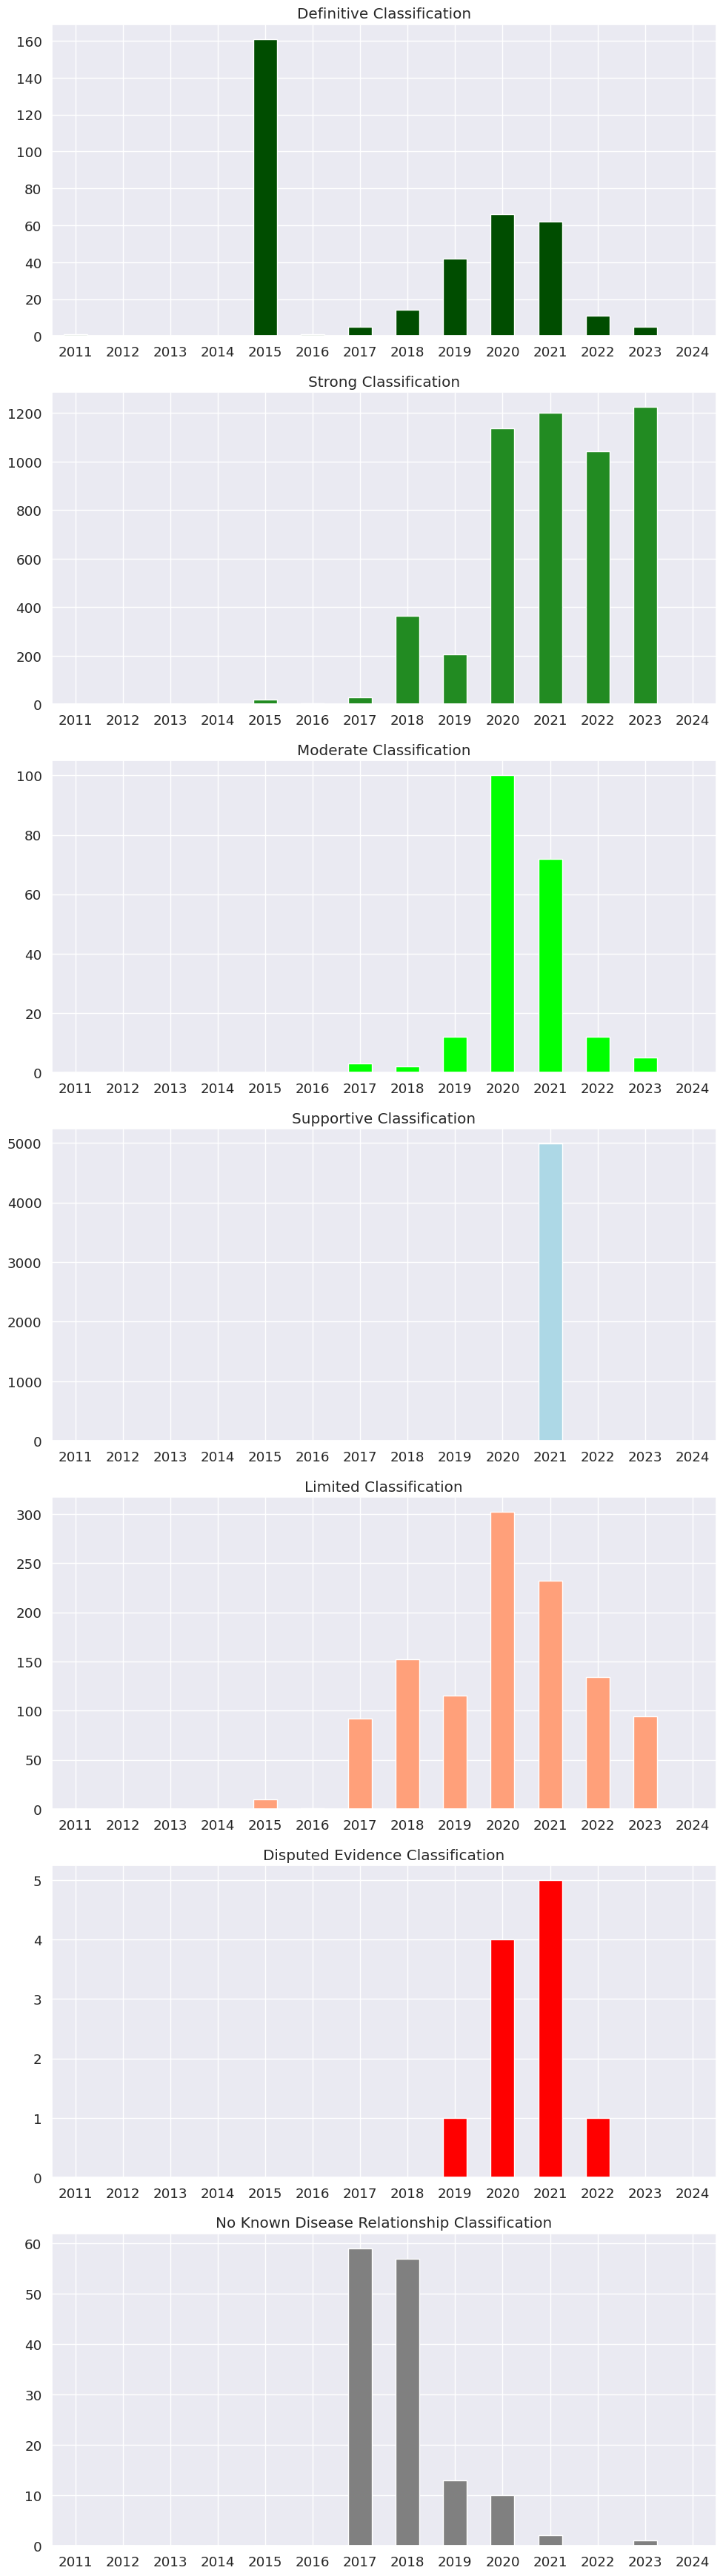

In [9]:
# Convert 'submitted_as_date' to datetime and extract the year
gencc_s['submitted_as_date'] = pd.to_datetime(gencc_s['submitted_as_date'])
gencc_s['year'] = gencc_s['submitted_as_date'].dt.year

# Create a range of years from 2011 to 2024
years = pd.RangeIndex(2011, 2025)

# Remove rows with 'NaN' in 'submitted_as_classification_name' column
gencc_s = gencc_s.dropna(subset=['submitted_as_classification_name'])

# Create a color dictionary
color_dict = {
    'Definitive': (0, 0.3, 0),
    'Strong': 'forestgreen',
    'Moderate': (0, 1, 0),
    'Supportive': 'lightblue',
    'Limited': 'lightsalmon',
    'Disputed Evidence': 'red',
    'No Known Disease Relationship': 'grey'
}

# Create a figure with a subplot for each classification in color_dict
fig, axs = plt.subplots(len(color_dict), 1, figsize=(10, 5*len(color_dict)))

# Plot a bar plot of the year for each classification in color_dict
for i, classification in enumerate(color_dict.keys()):
    classification_df = gencc_s[gencc_s['submitted_as_classification_name'] == classification]
    color = color_dict.get(classification, 'grey')  # Use color from dictionary if it exists, else use 'grey'
    classification_df['year'].value_counts().reindex(years, fill_value=0).sort_index().plot.bar(ax=axs[i], color=color)
    axs[i].set_title(f'{classification} Classification')
    axs[i].set_xticklabels(years, rotation=0)  # Set x-axis tick rotation

plt.tight_layout()
plt.show()

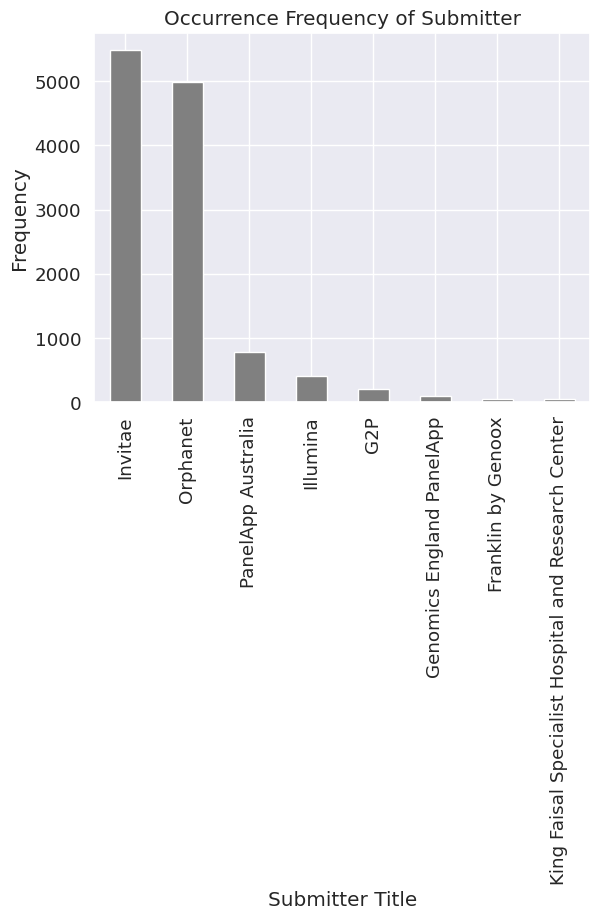

In [11]:
# Plot a histogram of the 'submitter_title' column
gencc_s['submitter_title'].value_counts().plot(kind='bar', color='grey')

plt.title('Occurrence Frequency of Submitter')
plt.xlabel('Submitter Title')
plt.ylabel('Frequency')

plt.xticks(rotation=90)
plt.show()

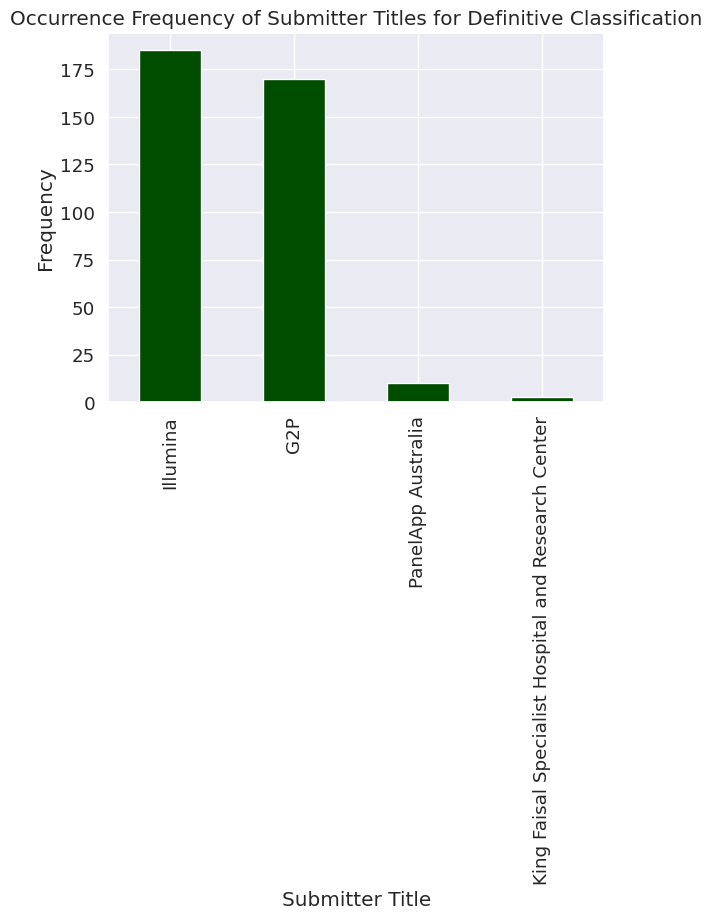

In [24]:
filtered_df = gencc_s[gencc_s['submitted_as_classification_name'].isin(['Definitive'])]

filtered_df['submitter_title'].value_counts().plot(kind='bar', color=(0,0.3,0))

plt.title('Occurrence Frequency of Submitter Titles for Definitive Classification')
plt.xlabel('Submitter Title')
plt.ylabel('Frequency')

plt.show()

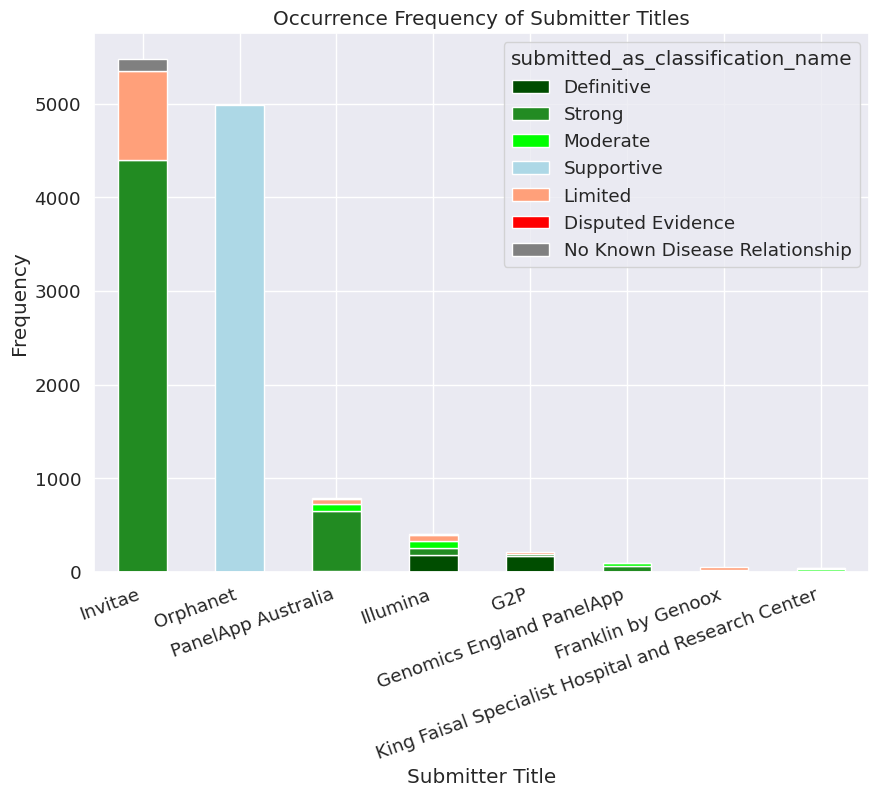

In [16]:
# Create a color dictionary
color_dict = {
    'Definitive': (0, 0.3, 0),
    'Strong': 'forestgreen',
    'Moderate': (0, 1, 0),
    'Supportive': 'lightblue',
    'Limited': 'lightsalmon',
    'Disputed Evidence': 'red',
    'No Known Disease Relationship': 'grey'
}

# Group by 'submitter_title' and 'submitted_as_classification_name', count the size, unstack and fill NaN with 0
grouped_df = gencc_s.groupby(['submitter_title', 'submitted_as_classification_name']).size().unstack(fill_value=0)

# Sort the columns based on the order in color_dict
grouped_df = grouped_df[list(color_dict.keys())]

# Add a total column
grouped_df['Total'] = grouped_df.sum(axis=1)

# Sort by the total column in descending order
grouped_df = grouped_df.sort_values('Total', ascending=False)

# Remove the total column
grouped_df = grouped_df.drop(columns='Total')

# Plot a stacked bar plot with the colors from color_dict
grouped_df.plot(kind='bar', stacked=True, color=list(color_dict.values()), figsize=(10, 7))

plt.title('Occurrence Frequency of Submitter Titles')
plt.xlabel('Submitter Title')
plt.ylabel('Frequency')

plt.xticks(rotation=20, ha='right')
plt.show()

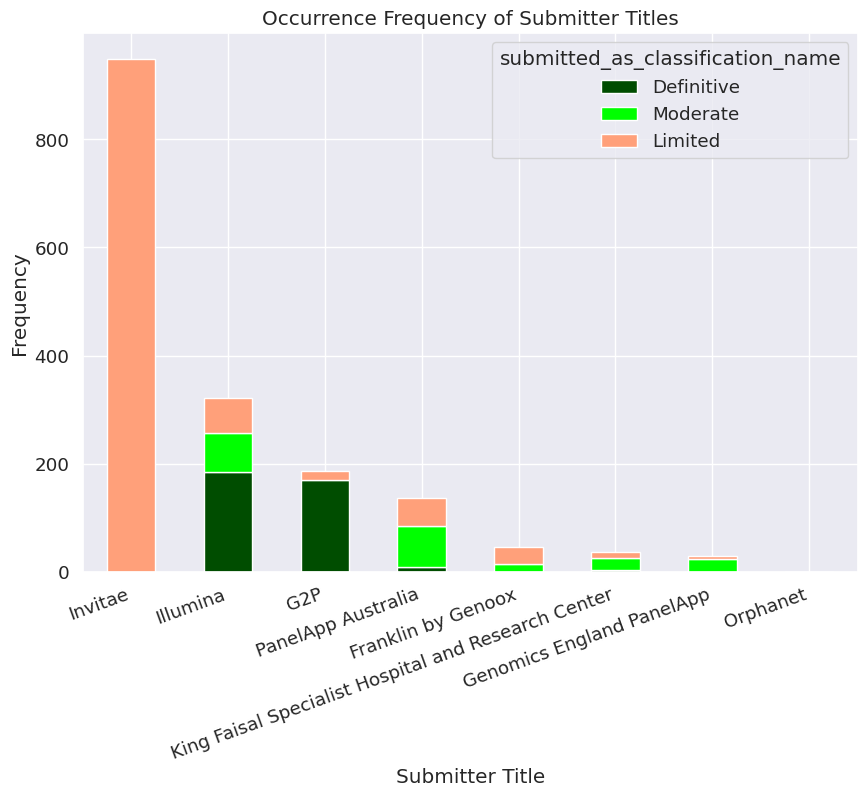

In [15]:
# Create a color dictionary
color_dict = {
    'Definitive': (0, 0.3, 0),
    'Moderate': (0, 1, 0),
    'Limited': 'lightsalmon'
}

# Group by 'submitter_title' and 'submitted_as_classification_name', count the size, unstack and fill NaN with 0
grouped_df = gencc_s.groupby(['submitter_title', 'submitted_as_classification_name']).size().unstack(fill_value=0)

# Filter the DataFrame to only include the columns in color_dict
grouped_df = grouped_df[list(color_dict.keys())]

# Add a total column
grouped_df['Total'] = grouped_df.sum(axis=1)

# Sort by the total column in descending order
grouped_df = grouped_df.sort_values('Total', ascending=False)

# Remove the total column
grouped_df = grouped_df.drop(columns='Total')

# Plot a stacked bar plot with the colors from color_dict
grouped_df.plot(kind='bar', stacked=True, color=list(color_dict.values()), figsize=(10, 7))

plt.title('Occurrence Frequency of Submitter Titles')
plt.xlabel('Submitter Title')
plt.ylabel('Frequency')

plt.xticks(rotation=20, ha='right')
plt.show()